In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import scipy

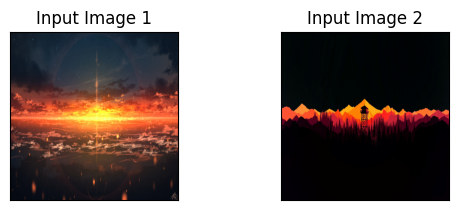

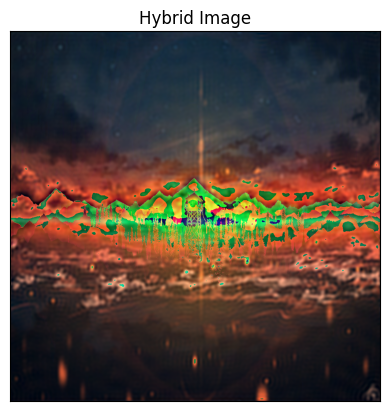

In [4]:
########## Hybrid Images #######################

# Load two images

img2 = cv2.imread('oled2.jpg')
img1 = cv2.imread('sunset.jpg')

img1 = cv2.resize(img1, (1024, 1024), interpolation=cv2.INTER_AREA)
img2 = cv2.resize(img2, (1024, 1024), interpolation=cv2.INTER_AREA)

# Compute the Fourier Transform of the images
f1 = np.fft.fft2(img1, axes=(0, 1))
fshift1 = np.fft.fftshift(f1, axes=(0, 1))
magnitude_spectrum1 = 20 * np.log(np.abs(fshift1))
phase_spectrum1 = np.angle(fshift1)

f2 = np.fft.fft2(img2, axes=(0, 1))
fshift2 = np.fft.fftshift(f2, axes=(0, 1))
magnitude_spectrum2 = 20 * np.log(np.abs(fshift2))
phase_spectrum2 = np.angle(fshift2)

# Apply a low-pass filter to one image for each channel
rows, cols, channels = img1.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 80
cv2.circle(mask, (ccol, crow), r, 1, -1)

fshift1_new = np.zeros_like(fshift1, dtype=complex)
for i in range(channels):
    fshift1_new[:, :, i] = fshift1[:, :, i] * mask

# Apply a high-pass filter to the other image for each channel
mask = np.ones((rows, cols), np.uint8)
r = 20
cv2.circle(mask, (ccol, crow), r, 0, -1)

fshift2_new = np.zeros_like(fshift2, dtype=complex)
for i in range(channels):
    fshift2_new[:, :, i] = fshift2[:, :, i] * mask

# Combine both frequency responses for each channel
fshift_new = fshift1_new + fshift2_new

# Compute the inverse Fourier Transform of the new frequency response for each channel
img_back_new = np.zeros_like(img1, dtype=np.complex128)
for i in range(channels):
    img_back_new[:, :, i] = np.fft.ifft2(np.fft.ifftshift(fshift_new[:, :, i], axes=(0, 1)))

# Take the magnitude of the complex values for the hybrid image
hybrid_image_magnitude = np.abs(img_back_new).astype(np.uint8)

# Plotting results
plt.subplot(221), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Input Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Input Image 2'), plt.xticks([]), plt.yticks([])
plt.show()

# Display the hybrid image
plt.imshow(cv2.cvtColor(hybrid_image_magnitude, cv2.COLOR_BGR2RGB))
plt.title('Hybrid Image'), plt.xticks([]), plt.yticks([])
plt.show()
############################################## 